<a href="https://colab.research.google.com/github/coraltllz/sintomas-psiquitatricos-de-alzheimer---analisis-red/blob/main/Proyecto_Patologias_AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import pandas as pd

In [ ]:
files.upload()

Saving A+ AD.xlsx - Sheet1.csv to A+ AD.xlsx - Sheet1.csv


{'A+ AD.xlsx - Sheet1.csv': b'Apat\xc3\xada,\r\nIrritabilidad,\r\nDepresi\xc3\xb3n,Ansiedad\r\nDepresi\xc3\xb3n,Conductas alimenticias\r\nAnsiedad,Conductas alimenticias\r\nAnsiedad,Depresi\xc3\xb3n\r\nConductas alimenticias,Ansiedad\r\nConductas alimenticias,Depresi\xc3\xb3n\r\nConductas nocturnas,Agitaci\xc3\xb3n\r\nConductas nocturnas,AMB\r\nAgitaci\xc3\xb3n,AMB\r\nAgitaci\xc3\xb3n,Conductas nocturnas\r\nAMB,Agitaci\xc3\xb3n\r\nAMB,Conductas nocturnas\r\nDesinhibici\xc3\xb3n,Delirios\r\nDesinhibici\xc3\xb3n,Euforia\r\nDesinhibici\xc3\xb3n,Alucinaciones\r\nDelirios,Euforia\r\nDelirios,Alucinaciones\r\nDelirios,Desinhibici\xc3\xb3n\r\nEuforia,Alucinaciones\r\nEuforia,Desinhibici\xc3\xb3n\r\nEuforia,Delirios\r\nAlucinaciones,Desinhibici\xc3\xb3n\r\nAlucinaciones,Delirios\r\nAlucinaciones,Euforia'}

In [ ]:
f = open("A+ AD.xlsx - Sheet1.csv", "r")
f.readline()

'Apatía,\n'

In [ ]:
f.readline()

'Irritabilidad,\n'

In [ ]:
ruta = "A+ AD.xlsx - Sheet1.csv"
G = nx.from_pandas_edgelist(pd.read_csv(ruta,
                                        skiprows = 0,
                                        header = None,
                                        sep = ","),
                            source = 0,
                            target = 1 )

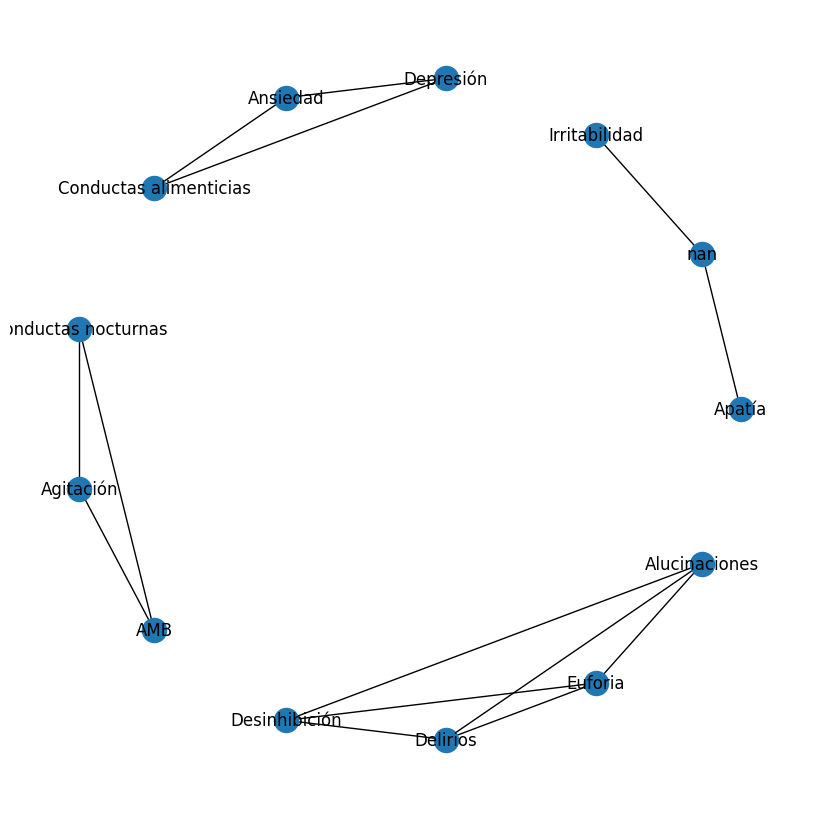

In [ ]:
plt.figure(figsize = [8,8])
nx.draw_circular(G,with_labels = True)

In [ ]:
len(G)

13

In [ ]:
G.nodes()

NodeView(('Apatía', nan, 'Irritabilidad', 'Depresión', 'Ansiedad', 'Conductas alimenticias', 'Conductas nocturnas', 'Agitación', 'AMB', 'Desinhibición', 'Delirios', 'Euforia', 'Alucinaciones'))

In [ ]:
len(G.edges)

14

In [ ]:
for c in nx.find_cliques(G):
    print(c)

['Alucinaciones', 'Desinhibición', 'Delirios', 'Euforia']
['Agitación', 'Conductas nocturnas', 'AMB']
['Conductas alimenticias', 'Ansiedad', 'Depresión']
['Apatía', nan]
['Irritabilidad', nan]


In [ ]:
pos = nx.kamada_kawai_layout(G)

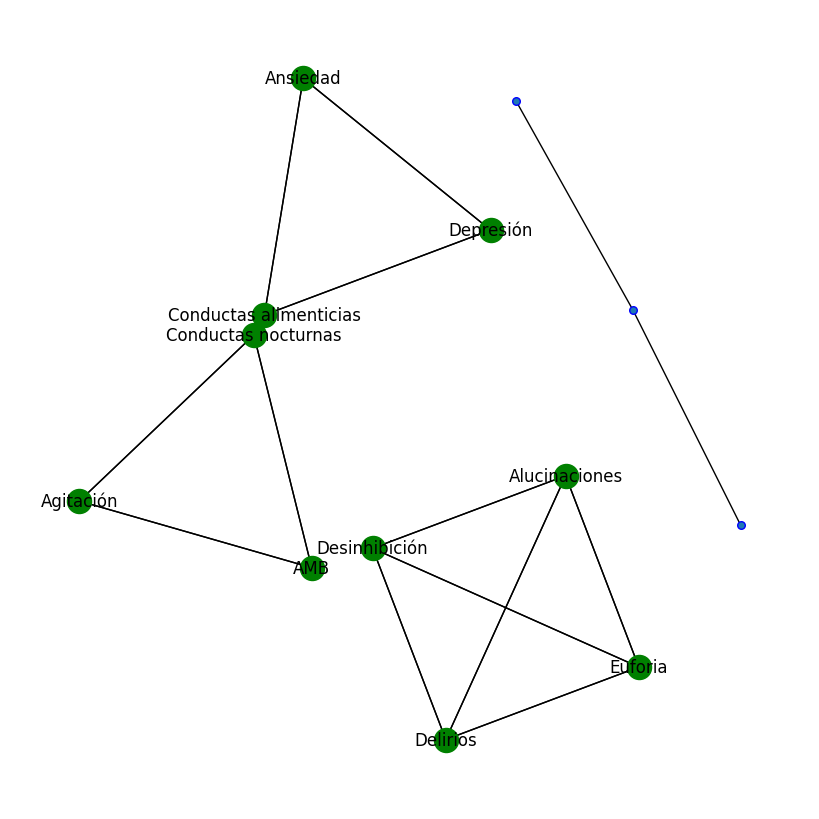

In [ ]:
plt.figure(figsize = [8,8])
nx.draw(G, pos = pos, node_size = 30, edgecolors = "b")
for c in nx.find_cliques(G):
   if len(c) >= 3:
    nx.draw(nx.subgraph(G, c), pos = pos, node_size = 300, node_color = "green", edgecolors = "green", with_labels = True)

In [ ]:
grados = G.degree
print(grados)

[('Apatía', 1), (nan, 2), ('Irritabilidad', 1), ('Depresión', 2), ('Ansiedad', 2), ('Conductas alimenticias', 2), ('Conductas nocturnas', 2), ('Agitación', 2), ('AMB', 2), ('Desinhibición', 3), ('Delirios', 3), ('Euforia', 3), ('Alucinaciones', 3)]


In [ ]:
colores = np.array([grados[nodo] for nodo in G])

In [ ]:
subgrafo = nx.subgraph_centrality(G)

In [ ]:
configuracion = nx.kamada_kawai_layout(G)

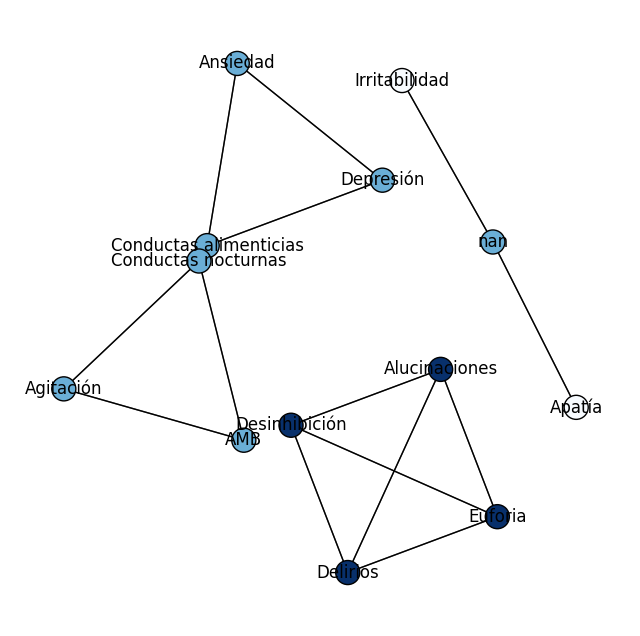

In [ ]:
plt.figure(figsize = [8,8])
nx.draw_networkx_edges(G,configuracion, alpha = 0.6)
nx.draw(G, configuracion, node_size = 300, edgecolors = "k", node_color = colores, cmap = plt.cm.Blues, with_labels = True)

In [ ]:
dicc = nx.clustering(G)

In [ ]:
colores = np.array([dicc[nodo] for nodo in G])

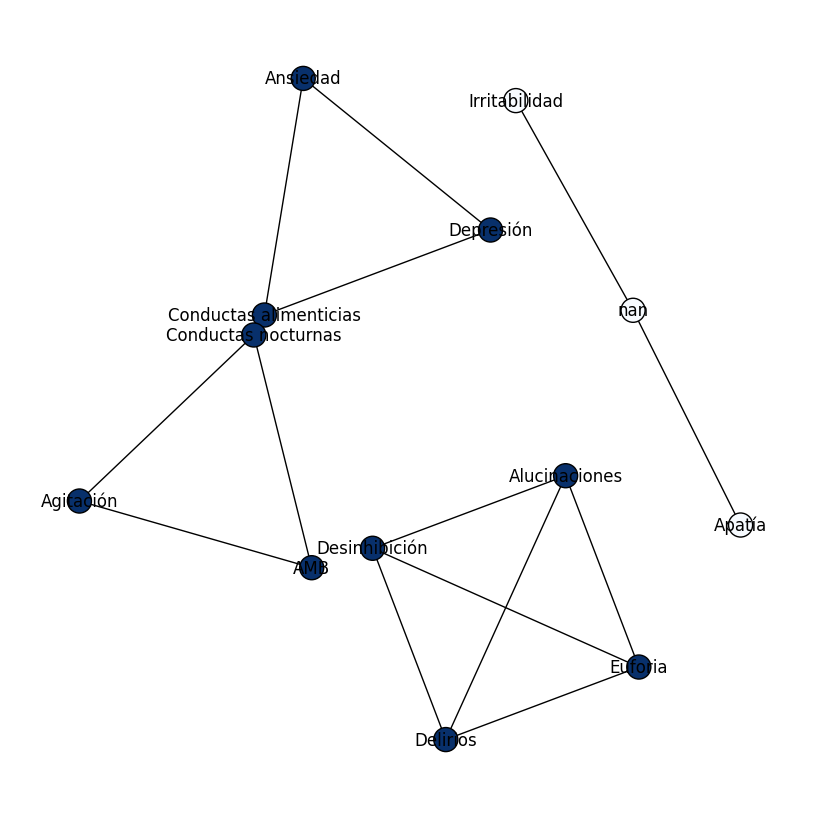

In [ ]:
plt.figure(figsize = [8,8])
nx.draw(G, pos = pos, node_size = 300, edgecolors = "k", node_color = colores, cmap = plt.cm.Blues, with_labels = True)